# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
   
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
      

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | crane
Processing Record 6 of Set 1 | selkirk
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | fort bragg
Processing Record 11 of Set 1 | smithers
Processing Record 12 of Set 1 | gadzhiyevo
Processing Record 13 of Set 1 | cles
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | vilhena
Processing Record 16 of Set 1 | fayzabad
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | isabela
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,27.99,89,40,5.66,CC,1718578894
1,albany,42.6001,-73.9662,24.26,52,96,0.45,US,1718578847
2,rio grande,-32.0350,-52.0986,17.06,90,100,7.22,BR,1718578895
3,longyearbyen,78.2186,15.6401,5.91,75,75,7.20,SJ,1718578895
4,crane,31.3974,-102.3501,37.64,23,0,10.77,US,1718578895


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,27.99,89,40,5.66,CC,1718578894
1,albany,42.6001,-73.9662,24.26,52,96,0.45,US,1718578847
2,rio grande,-32.0350,-52.0986,17.06,90,100,7.22,BR,1718578895
3,longyearbyen,78.2186,15.6401,5.91,75,75,7.20,SJ,1718578895
4,crane,31.3974,-102.3501,37.64,23,0,10.77,US,1718578895


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

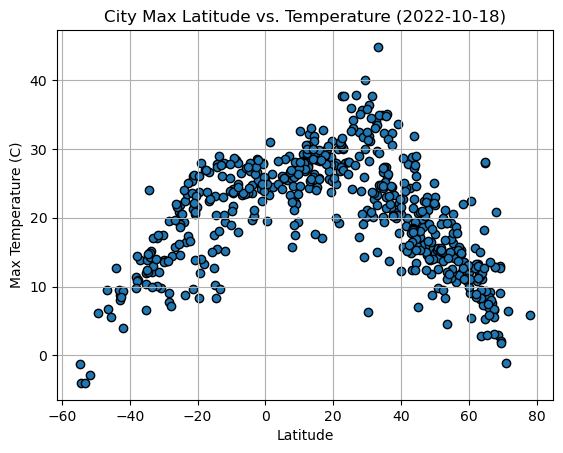

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='k')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

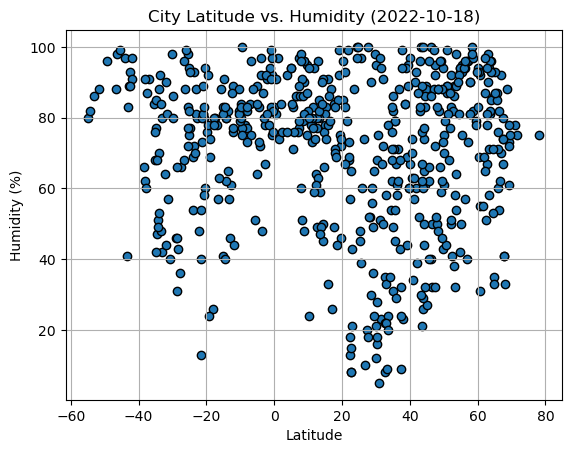

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='k')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

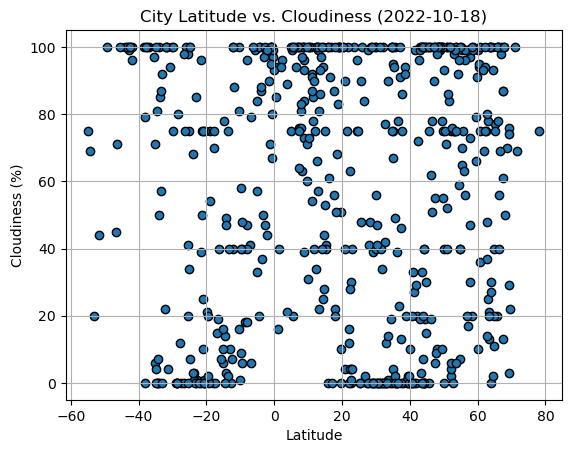

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='k')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

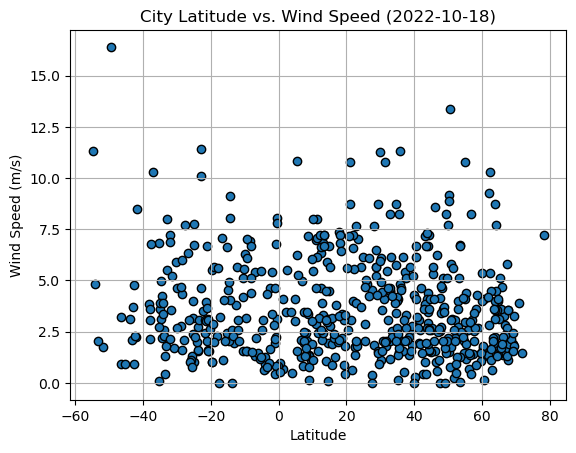

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='k')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,24.26,52,96,0.45,US,1718578847
3,longyearbyen,78.2186,15.6401,5.91,75,75,7.20,SJ,1718578895
4,crane,31.3974,-102.3501,37.64,23,0,10.77,US,1718578895
5,selkirk,50.1436,-96.8845,23.04,61,0,9.17,CA,1718578895
6,iqaluit,63.7506,-68.5145,2.85,81,100,8.75,CA,1718578871


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,27.99,89,40,5.66,CC,1718578894
2,rio grande,-32.0350,-52.0986,17.06,90,100,7.22,BR,1718578895
8,alice springs,-23.7000,133.8833,8.75,93,3,1.54,AU,1718578896
13,east london,-33.0153,27.9116,16.99,80,92,5.51,ZA,1718578898
14,vilhena,-12.7406,-60.1458,26.12,61,0,2.06,BR,1718578898


###  Temperature vs. Latitude Linear Regression Plot

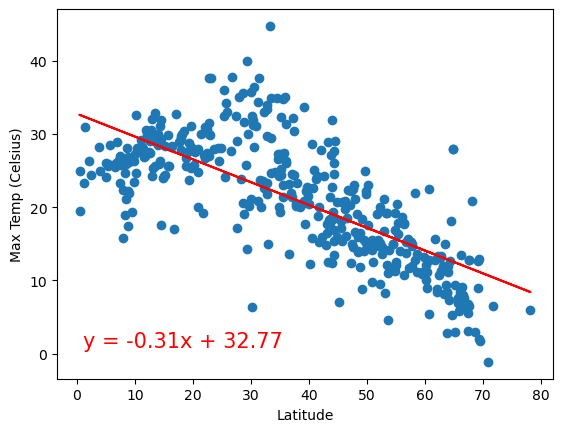

The r-value is: 0.5281629778198235


In [38]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.annotate(line,(0.95, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")

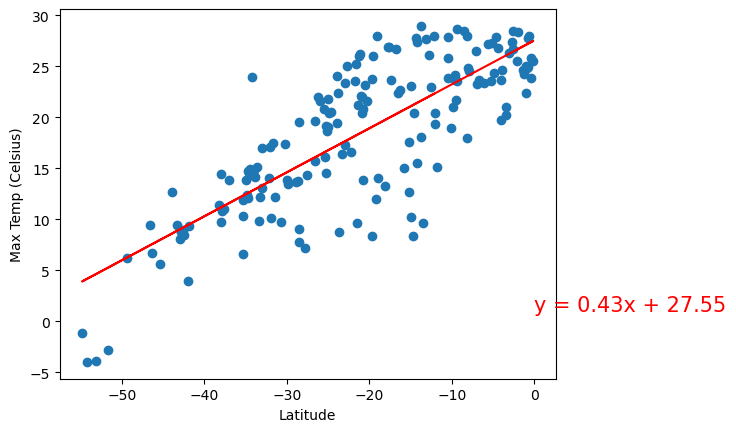

The r-value is: 0.6350264362356891


In [70]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Linear regression

line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')
plt.annotate(line,(0.01, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")

**Discussion about the linear relationship:** The linear regression in our plots models the relationship between latitude and maximum temperature.
 In our slopes, we can see that for the Northern Hemisphere, we have a negative value (-31), which means that as our latitude increases, the temperature decreases. For the Southern Hemisphere, we have a positive slope (0.43), meaning that as latitude increases towards the equator, the temperature increases as well. 
 Both hemispheres show that temperatures are higher closer to the equator and decrease as you move towards the poles.

### Humidity vs. Latitude Linear Regression Plot

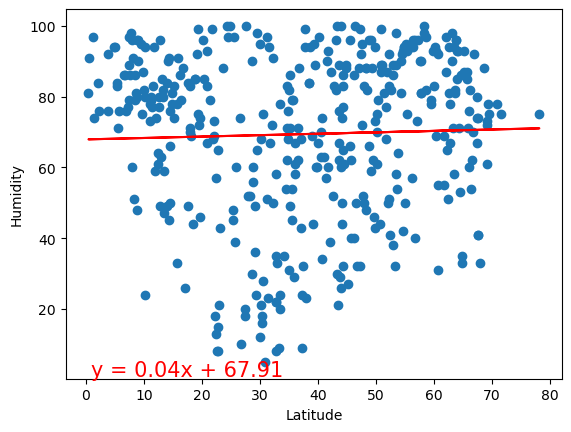

The r-value is: 0.001067975598740987


In [76]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']


slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line,(0.95, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")

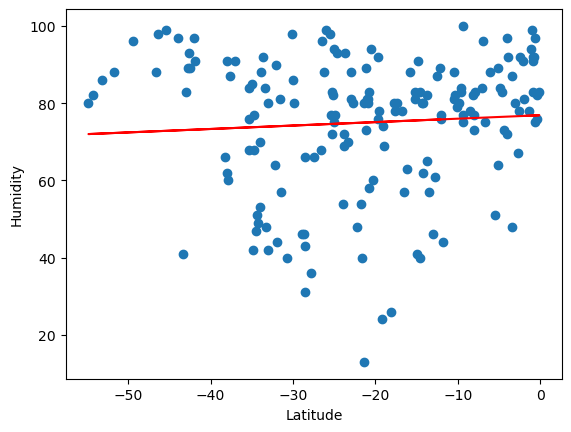

The r-value is: 0.004641845754527961
Slope 0.08895602719885079, Intercept 76.87218292143464


In [96]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line,(0.95, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")
print(f'Slope {slope}, Intercept {intercept}')

**Discussion about the linear relationship:** Our linear regression is made up of slopes and intercepts. Both slopes (Northern and Southern Hemispheres) show numbers very close to zero, which allows us to conclude that the relationship between latitude and humidity is extremely weak. 
The r-values indicate almost no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

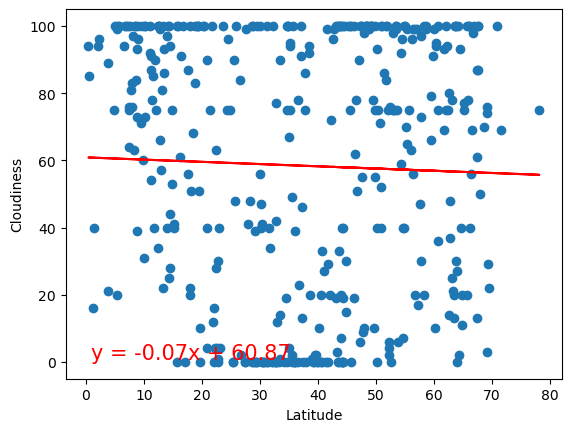

The r-value is: 0.0010880214858561073


In [79]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']


slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line,(0.95, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")

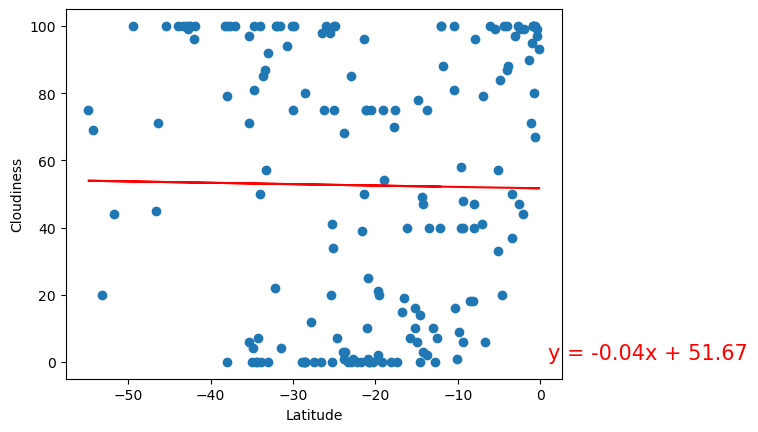

The r-value is: 0.0001950678162418602


In [80]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']


slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line,(0.95, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")

**Discussion about the linear relationship:** The data points are widely scattered around the regression lines in both plots, indicating the lack of a strong relationship between latitude and cloudiness.
The patterns observed in both hemispheres are quite similar, with both showing very weak negative slopes and low r-values.

### Wind Speed vs. Latitude Linear Regression Plot

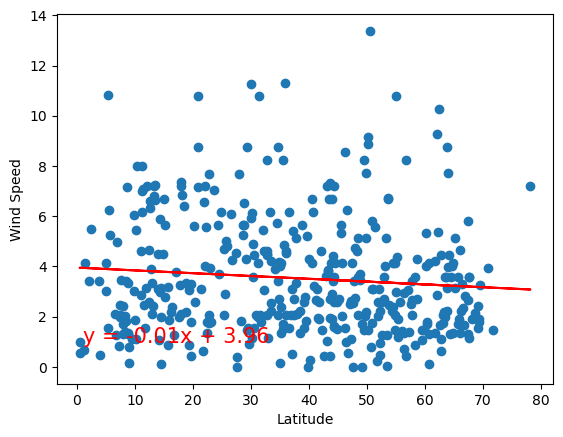

The r-value is: 0.008190812824219998


In [86]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']


slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line,(0.95, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")

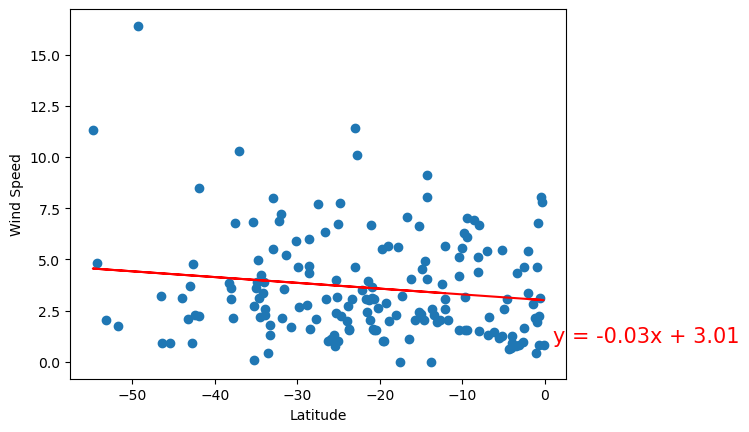

The r-value is: 0.022451380068185155
Slope -0.028185126730022585, Intercept 3.013515667905883


In [97]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']


slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept


line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the data points
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line,(0.95, 0.95),fontsize=15,color="red")
plt.show()


print(f"The r-value is: {r_value**2}")
print(f'Slope {slope}, Intercept {intercept}')

**Discussion about the linear relationship:** There are no significant correlations between these weather factors and latitude in either hemisphere, suggesting that these factors are influenced more by local geographical and meteorological conditions rather than latitude alone.